In [1]:
#install packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize



In [2]:
#Load the data
LoanPayDF = pd.read_csv("bankPayment.csv")

In [3]:
#check the loaded data
LoanPayDF.head()

,loan_amnt,int_rate,EmploymentLength,Loan_Purpose,home_ownership,LoanTerm,total_rec_prncp,total_rec_int,total_pymnt
0,1000,31.0,10,9.0,1,1,34.93,48.25,83
1,1000,10.0,10,7.0,1,1,49.38,12.80,64
2,1000,8.0,10,9.0,1,1,39.22,36.67,62
3,1000,23.0,2,3.0,1,1,50.65,10.09,76
4,1000,19.0,3,3.0,1,1,42.02,29.66,72


In [4]:
#confirm the data types 
LoanPayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5436 entries, 0 to 5435
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_amnt          5436 non-null   int64  
 1   int_rate           5434 non-null   float64
 2   EmploymentLength   5436 non-null   int64  
 3   Loan_Purpose       5419 non-null   float64
 4   home_ownership     5436 non-null   int64  
 5   LoanTerm           5436 non-null   int64  
 6   total_rec_prncp    5434 non-null   float64
 7   total_rec_int      5436 non-null   float64
 8   total_pymnt        5436 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 382.3 KB


In [5]:
#check whether the data has NA
LoanPayDF.isnull().sum()

loan_amnt             0
int_rate              2
EmploymentLength      0
Loan_Purpose         17
home_ownership        0
LoanTerm              0
total_rec_prncp       2
total_rec_int         0
total_pymnt           0
dtype: int64

In [6]:
#Remove Null values (NA)
LoanPayDF.dropna(inplace = True)

In [7]:
#check whether the data has NA
LoanPayDF.isnull().sum()

loan_amnt            0
int_rate             0
EmploymentLength     0
Loan_Purpose         0
home_ownership       0
LoanTerm             0
total_rec_prncp      0
total_rec_int        0
total_pymnt          0
dtype: int64

/var/folders/37/9ntfvc_x2nq7277sdc749w_c0000gn/T/ipykernel_85185/2954930329.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


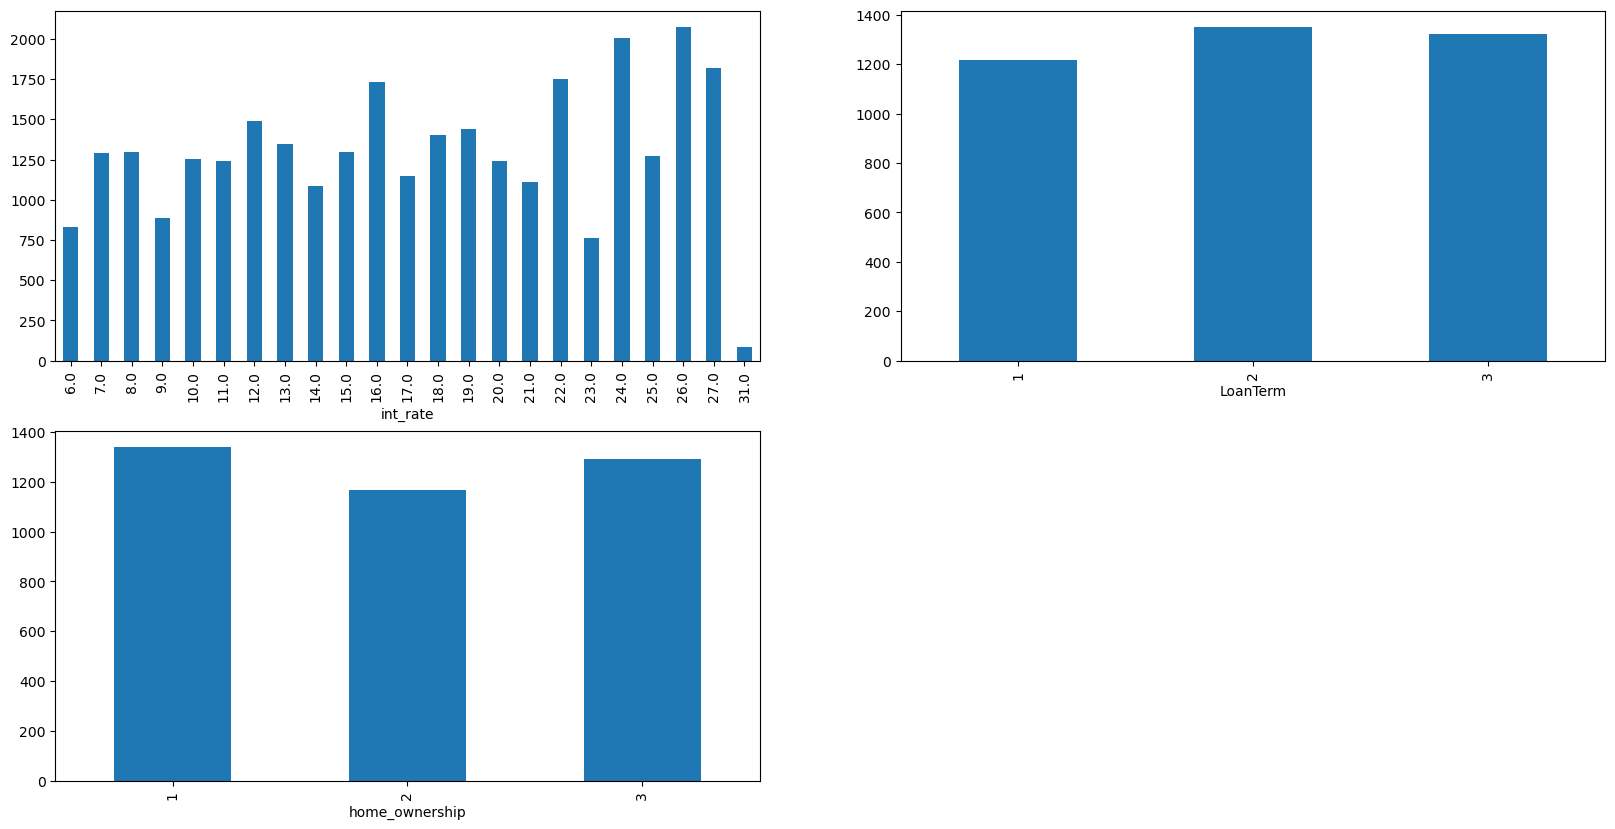

In [8]:
#Analyze and plot some of the variables
features = ['int_rate', 'LoanTerm', 'home_ownership']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    LoanPayDF.groupby(col).mean()['total_pymnt'].plot.bar()
plt.show()

In [9]:
LoanPayDF.head()

,loan_amnt,int_rate,EmploymentLength,Loan_Purpose,home_ownership,LoanTerm,total_rec_prncp,total_rec_int,total_pymnt
0,1000,31.0,10,9.0,1,1,34.93,48.25,83
1,1000,10.0,10,7.0,1,1,49.38,12.80,64
2,1000,8.0,10,9.0,1,1,39.22,36.67,62
3,1000,23.0,2,3.0,1,1,50.65,10.09,76
4,1000,19.0,3,3.0,1,1,42.02,29.66,72


In [10]:
#normalize the data
LoanPayDF = pd.DataFrame(normalize (LoanPayDF), columns=LoanPayDF.columns)

In [11]:
LoanPayDF.head()

,loan_amnt,int_rate,EmploymentLength,Loan_Purpose,home_ownership,LoanTerm,total_rec_prncp,total_rec_int,total_pymnt
0,0.994259,0.030822,0.009943,0.008948,0.000994,0.000994,0.034729,0.047973,0.082524
1,0.996543,0.009965,0.009965,0.006976,0.000997,0.000997,0.049209,0.012756,0.063779
2,0.996531,0.007972,0.009965,0.008969,0.000997,0.000997,0.039084,0.036543,0.061785
3,0.995536,0.022897,0.001991,0.002987,0.000996,0.000996,0.050424,0.010045,0.075661
4,0.995920,0.018922,0.002988,0.002988,0.000996,0.000996,0.041849,0.029539,0.071706


In [12]:
#define the x and y variables
x=LoanPayDF.drop('total_pymnt',axis='columns')
y=LoanPayDF['total_pymnt']

In [13]:
#split the data into train and test dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [14]:
#build the model sklearn
LoanPaymod = LinearRegression()
LoanPaymod.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [15]:
#build the model sklearn
LoanPaymod = LinearRegression()
LoanPaymod.fit(x_train, y_train)

LinearRegression()

In [16]:
# create stastical summary.....
model = sm.OLS(y, X).fit()
print (model.summary ())

NameError: name 'X' is not defined

In [17]:
# create stastical summary.....
model = sm.OLS(y, x).fit()
print (model.summary ())

                                 OLS Regression Results                                
Dep. Variable:            total_pymnt   R-squared (uncentered):                   0.281
Model:                            OLS   Adj. R-squared (uncentered):              0.280
Method:                 Least Squares   F-statistic:                              264.3
Date:                Thu, 25 Jan 2024   Prob (F-statistic):                        0.00
Time:                        15:51:32   Log-Likelihood:                          5027.3
No. Observations:                5415   AIC:                                 -1.004e+04
Df Residuals:                    5407   BIC:                                     -9986.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------